# 準備

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys

In [ ]:
dirpath = '/content/drive/MyDrive/RapidChallenge/DNN'

if dirpath not in sys.path:
  sys.path.append('/content/drive/MyDrive/RapidChallenge/DNN')

In [ ]:
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/RapidChallenge/DNN']

# importと関数定義

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from common import functions

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    if not isinstance(vec, float):
      print("shape: " + str(vec.shape))
    print("")

# Section1: 入力層から中間層

## 要点まとめ

入力層で受け取る学習データに重みを掛けたものとバイアスが
中間層の入力になる。中間層の入力は活性化関数と呼ばれる関数で処理された後、次の層へと渡される。深層学習では重みとバイアスを学習対象のパラメータである。

## 確認テスト

- $ u = Wx + b $をPythonで書け

    u = np.dot(x, W) + b

- 中間層の出力を定義しているソースを抜きだせ

    % 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    % 2層の総出力
    z2 = functions.relu(u2)

- 活性化関数などよく使う関数は自作モジュールで定義しておくと、管理しやすくなる
- ReLU関数はnp.maximum(0, x)のようにのようにnumpyを使って実装されている。。numpyは行列データを高速で扱うように設計されているので、可能な限り可能な限りnumpyの関数を使うと処理が高速化できる

## 順伝播（単層・単ユニット）

In [ ]:
# 順伝播（単層・単ユニット）

# 重み
W = np.array([[0.1], [0.2]])

print_vec("重み", W)


# バイアス
b = 0.5

print_vec("バイアス", b)

# 入力値
x = np.array([2, 3])
print_vec("入力", x)


# 総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.relu(u)
print_vec("中間層出力", z)

*** 重み ***
[[0.1]
 [0.2]]
shape: (2, 1)

*** バイアス ***
0.5

*** 入力 ***
[2 3]
shape: (2,)

*** 総入力 ***
[1.3]
shape: (1,)

*** 中間層出力 ***
[1.3]
shape: (1,)



## 順伝播（単層・複数ユニット）

In [ ]:
# 順伝播（単層・複数ユニット）

# 重み
W = np.array([
    [0.1, 0.2, 0.3], 
    [0.2, 0.3, 0.4], 
    [0.3, 0.4, 0.5],
    [0.4, 0.5, 0.6]
])

print_vec("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print_vec("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print_vec("入力", x)


#  総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.sigmoid(u)
print_vec("中間層出力", z)


*** 重み ***
[[0.1 0.2 0.3]
 [0.2 0.3 0.4]
 [0.3 0.4 0.5]
 [0.4 0.5 0.6]]
shape: (4, 3)

*** バイアス ***
[0.1 0.2 0.3]
shape: (3,)

*** 入力 ***
[ 1.  5.  2. -1.]
shape: (4,)

*** 総入力 ***
[1.4 2.2 3. ]
shape: (3,)

*** 中間層出力 ***
[0.80218389 0.90024951 0.95257413]
shape: (3,)



## 順伝播（3層・複数ユニット）

In [ ]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])
    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])
    network['W3'] = np.array([
        [0.1, 0.3],
        [0.2, 0.4]
    ])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    network['b3'] = np.array([1, 2])

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", z1)
    print("出力合計: " + str(np.sum(z1)))

    return y, z1, z2

# 入力値
x = np.array([1., 2.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2.]
shape: (2,)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]
shape: (2, 3)

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]
shape: (3, 2)

*** 重み3 ***
[[0.1 0.3]
 [0.2 0.4]]
shape: (2, 2)

*** バイアス1 ***
[0.1 0.2 0.3]
shape: (3,)

*** バイアス2 ***
[0.1 0.2]
shape: (2,)

*** バイアス3 ***
[1 2]
shape: (2,)

##### 順伝播開始 #####
*** 総入力1 ***
[0.6 1.3 2. ]
shape: (3,)

*** 中間層出力1 ***
[0.6 1.3 2. ]
shape: (3,)

*** 総入力2 ***
[1.02 2.29]
shape: (2,)

*** 出力1 ***
[0.6 1.3 2. ]
shape: (3,)

出力合計: 3.9


#Section2: 活性化関数

## 要点まとめ

- NNで次の層への出力の大きさを決める非線形な関数を活性化関数という
- 中間層用として以下のようなものがある；
  - ReLu関数

    今、最も使われている関数。勾配消失問題の回避とスパース化に貢献して、よい成果をもたらす

  - シグモイド関数
    - 0〜1の間を緩やかに変化する関数
    - 信号の強弱を伝えられる
    - 大きな入力値では出力の変化が微小となり、勾配消失問題が発生する

  - ステップ関数
    - パーセプトロンで利用された関数
    - 線形分離可能なものしか学習できない

## 確認テスト

- 線形と非線形の違いを図で説明せよ

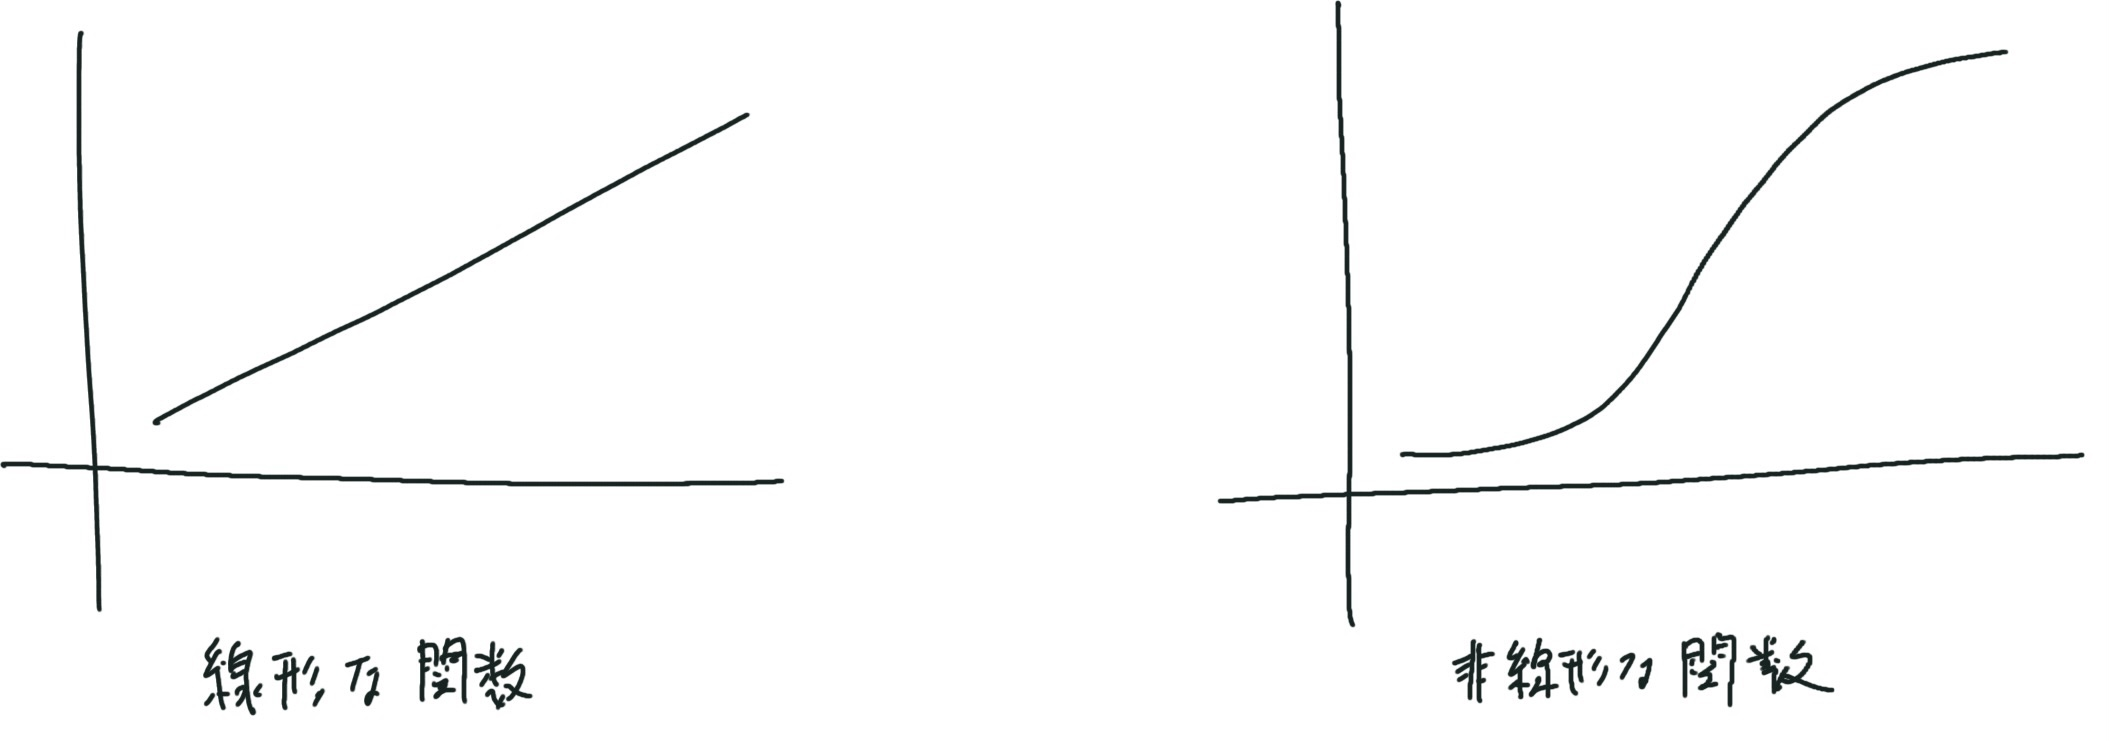

- 配布されたコードから活性化関数を実装している箇所を抜きだせ

  z2 = functions.relu(u2)

# Section3: 出力層

## 要点まとめ

出力層の役割は、各クラスごとの確率など人が理解できる形式に出力を変換すること

出力層の出力値と目標値の誤差で学習する際に、NNの出力がどの程度合っているかを定量化するのが誤差関数。二乗誤差や交差エントロピーがよく使われる


- 出力層の活性化関数
  - 回帰問題
    - 活性化関数は恒等変換、誤差関数は二乗誤差
  - 2値分類問題
    - 活性化関数はシグモイド関数、誤差関数は交差エントロピー
  - 多クラス問題
    - 活性化関数はソフトマックス関数、誤差関数は交差エントロピー

## 確認テスト

- 誤差関数をを2乗する理由と、1/2する理由
  - 2乗するのは、引き算だけだと正負両方の誤差が発生して、全体の誤差を表すのに都合が悪い。悪い。2乗して正の値だけにするため
  - 1/2するのは、誤差逆伝播の計算で誤差関数の微分を用いるとき、計算式を簡単にするため

- ソフトマックス関数の①〜③に該当するソースコードを示して説明せよ

\begin{align}
 \overset{①}{f(i,u)}=\frac{\overset{②}{e^{u_{i}}}}{\overset{③}{\sum_{k=1}^{K}}}
\end{align}

def softmax(x):①入力xを配列として受け取る

    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x)② / np.sum(np.exp(x))③

    ②xの要素ごとに指数関数で処理する
    ③xの要素ごとの指数関数処理値の総和を算出する

- 交差エントロピーの①〜②に該当するソースコードを示して説明せよ

\begin{align}
 \overset{①}{E_n(w)}=\overset{②}{-\sum_{i=1}^{I}d_i \log y_i}
\end{align}

def cross_entropy_error(d, y):①dとyを配列として受け取る

    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7))② / batch_size

    ②numpy.log(y,d)と入力することで、入力することで、d*log(y)が算出できる。その結果を結果をnumpy.sumで総和を算出する


- 非線形な活性化関数を使うと複雑な学習データを扱うことができる。どの活性化関数を使うかで、学習の精度や時間が大きく変わる

# Section4: 勾配降下法

## 要点まとめ

深層学習の目的は学習を通じて誤差を最小化するネットワークを作成すること。ここで誤差を最小にするようなパラメータを見つけるために、勾配降下法が使用される

勾配降下法 $w^{(t+1)}=w^{(t)} - \epsilon \nabla E$の学習率 $\epsilon$で学習の速さが調節できる。しかし、学習率が大きすぎると発散したり、小さすぎると収束するまでの時間がかかるという難しさがある


手法として、以下のようなものがある:
- Momentum

  物理現象の慣性を参考にして、現在のパラメータの大きさに応じて変化速度が低下させることで収束を早める手法

- AdaGrad

  誤差の勾配から学習の進み具合を判断して学習率を調整する手法

- Adadelta

  誤差の勾配とパラメータの単位が等しくなるようにして調整する手法。学習率をもたないという特徴がある

- Adam

  MomentumとAdaGradを組み合わせた手法。非常によく使われる

勾配降下法が全サンプルの平均誤差を一括で扱うバッチ学習なのに対して、ランダムに抽出するサンプルの誤差で学習する確率的勾配降下法がある。

確率的勾配降下法の特徴
- 望まない局所極小解に収束するリスクを低減
- データが冗長なとき計算コスト低減
- オンライ学習が可能


## 確認テスト

- 勾配降下法を実装しているソースコード箇所を抜きだせ抜きだせ

  - $w^{(t+1)}=w^{(t)} - \epsilon \nabla E$
    
    - network[key]  -= learning_rate * grad[key]

  - $\frac{\partial E}{\partial w} = \left[ \begin{matrix} \frac{\partial E}{\partial w_1} \cdots \frac{\partial \partial E}{\partial w_M} \end{matrix} \right]$

      - grad = backward(x, d, z1, y)

- オンライン学習について、2行で説明せよ

  - オンライン学習とは、新しい学習データが入ってくるたびにパラメータを更新して学習を進める手法である。一方で、バッチ学習は、すべての学習データを一括してパラメータを更新する手法である

- $w^{(t+1)}=w^{(t)} - \epsilon \nabla E_t $の意味を図を書いて説明せよ

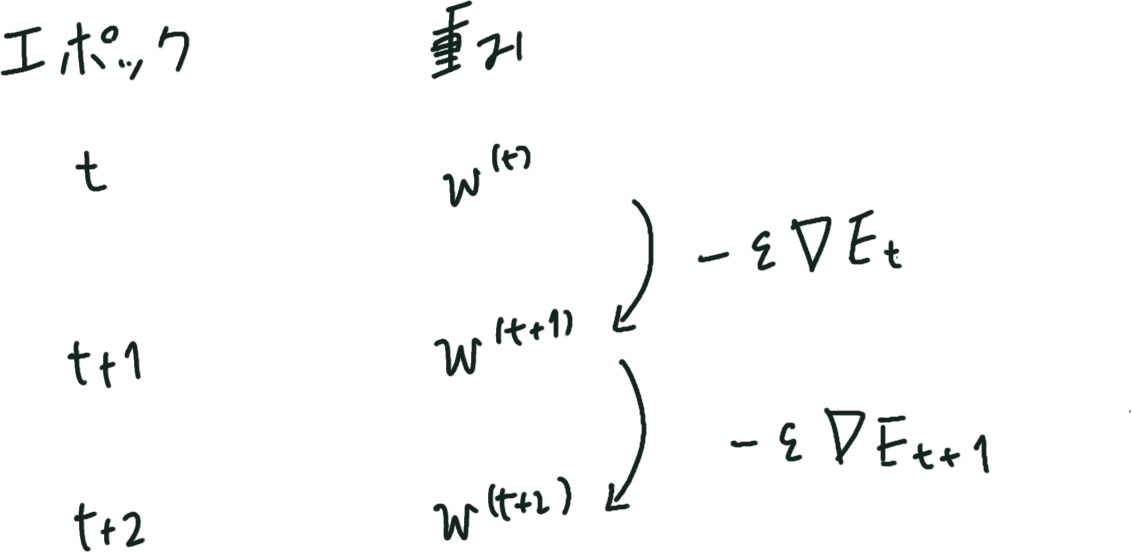

In [ ]:
def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

In [ ]:
# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

In [ ]:
# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    #delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

##### 結果表示 #####


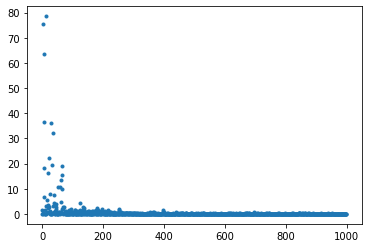

In [ ]:
#yの値を予想するAI

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    #data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.007

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

# Section5: 誤差逆伝播法

## 要点まとめ

算出された誤差を出力層側から微分して前の層に伝播させる。最小限の計算で各パラメータでの微分値を解析的に計算する手法

誤差伝播法は他の最適化アルゴリズムに対して以下のメリットがあるメリットがある
  - 微分を解析的に扱えるので、数値微分を行う手法より使用するメモリ量が少なくて済む
  - 微分が式で与えられるので実装が容易
  - 誤差伝播法は勾配降下法で使う学習率以外に、調整が必要なパラメータをもたない


## 確認テスト

- 逆誤差伝播法では不要な再起的処理を避けることができる。すでに行った計算結果を保持しているソースコードを抽出せよ

delta2 = functions.d_mean_squared_error(d, y)

delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

出力層での誤差で算出した結果delta2を前の層の計算で使用して、再起的な処理を回避している

- 次の処理に該当するコードは？

  - $\frac{\partial E}{\partial y}\frac{\partial y}{\partial u} $

    - delta2 = functions.d_mean_squared_error(d, y) $\leftarrow$ $y=u$のように出力層は恒等変換なので、$\frac{\partial y}{\partial u}$は1

  - $\frac{\partial E}{\partial y}\frac{\partial y}{\partial u}\frac{\partial u}{\partial w_{ji}^{(2)}} $

    - delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

##### 結果表示 #####


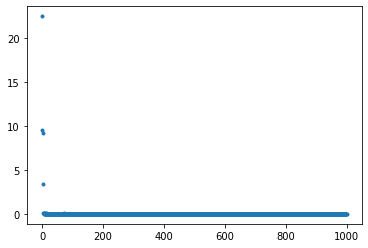

##### 結果表示 #####


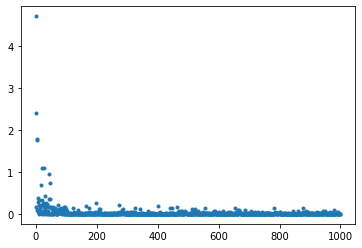

In [ ]:
# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

- 実装時には、各層で順伝播と逆伝播で同じ活性化関数となるように注意する